### This notebook will be mainly used for the capstone project

### Business Problem 

In this project, we will try to predict the possibility of a car driver involved in a car accident under certain weather and road condition. This project will also try to give the possible severity of the accident. Specifically, this project will focus on Seattle City.

### Data

Based on our problem, the data used in the project will include:    
1. the severity of the accident;
2. the weather;
3. road condition;
4. the light condition;
5. speeding or not;
6. crosswalk or not
We will use the data of yearly Collisions record of Seattle City as train data.

In [13]:
import pandas as pd
import numpy as np

import data

In [14]:
df_data = pd.read_csv('Data-Collisions.csv')
df_data.head()

d:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


choose features

In [28]:
df = df_data [['WEATHER','ROADCOND','LIGHTCOND','SPEEDING','CROSSWALKKEY','SEVERITYCODE']]
df.head()

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,CROSSWALKKEY,SEVERITYCODE
0,Overcast,Wet,Daylight,NaN,0,2
1,Raining,Wet,Dark - Street Lights On,NaN,0,1
2,Overcast,Dry,Daylight,NaN,0,1
3,Clear,Dry,Daylight,NaN,0,1
4,Raining,Wet,Daylight,NaN,0,2


clean data

In [29]:

df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace('Y', 1, inplace=True)

df['CROSSWALKKEY'] [df['CROSSWALKKEY'] > 0] = 1

df.dropna(how='any',inplace = True) 
df.head()

d:\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
d:\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: Set

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,CROSSWALKKEY,SEVERITYCODE
0,Overcast,Wet,Daylight,0,0,2
1,Raining,Wet,Dark - Street Lights On,0,0,1
2,Overcast,Dry,Daylight,0,0,1
3,Clear,Dry,Daylight,0,0,1
4,Raining,Wet,Daylight,0,0,2


In [91]:
df['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

plot features vs severity

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

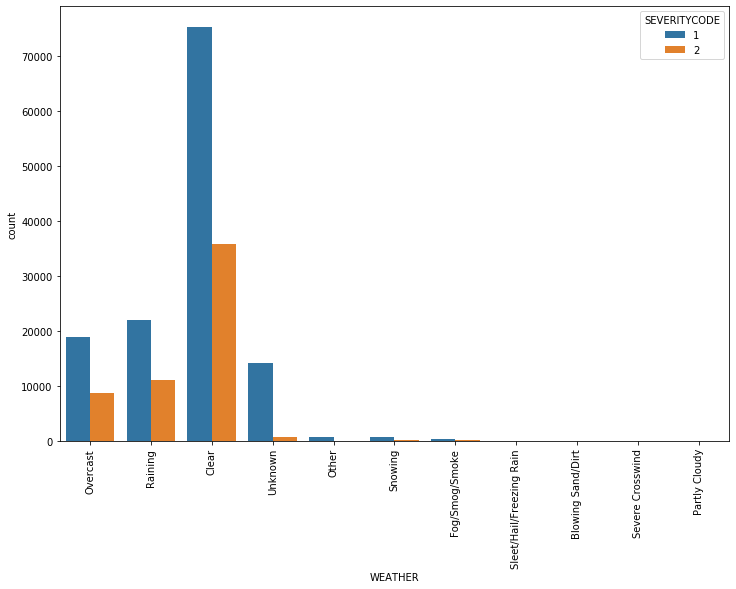

In [47]:
# plot features vs severity : weather
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

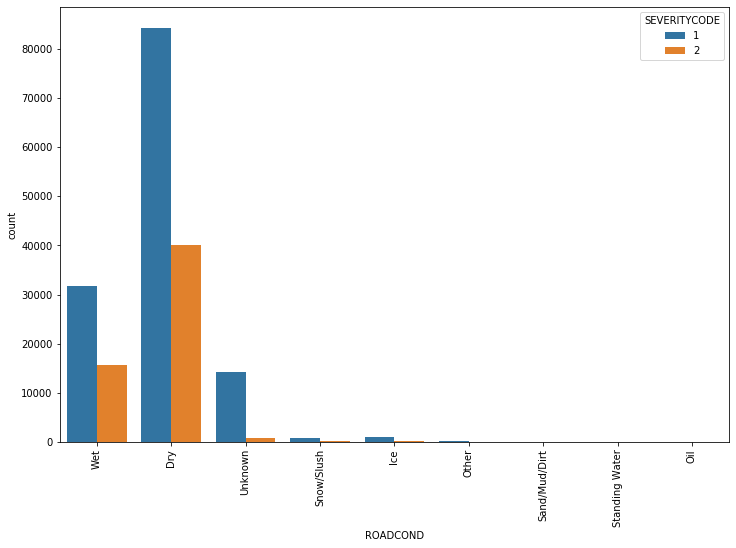

In [48]:
# plot features vs severity : roadcondition
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

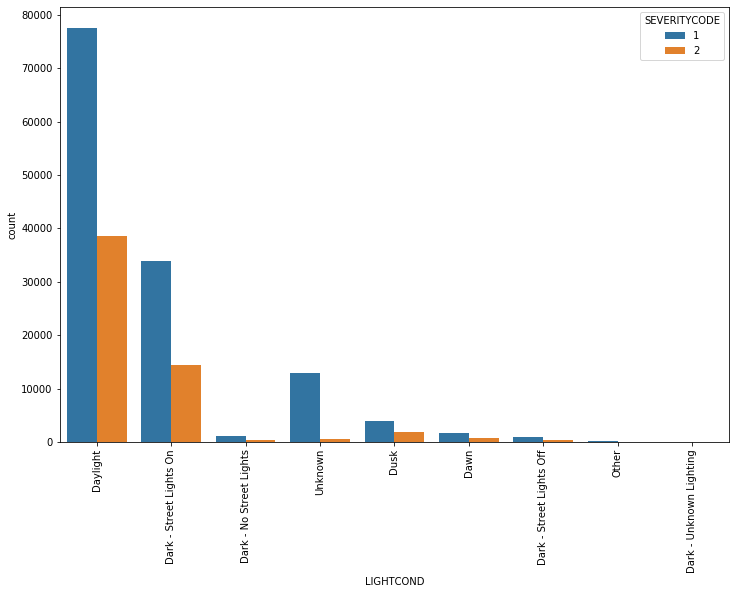

In [49]:
# plot features vs severity : lightcondition
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYCODE", data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

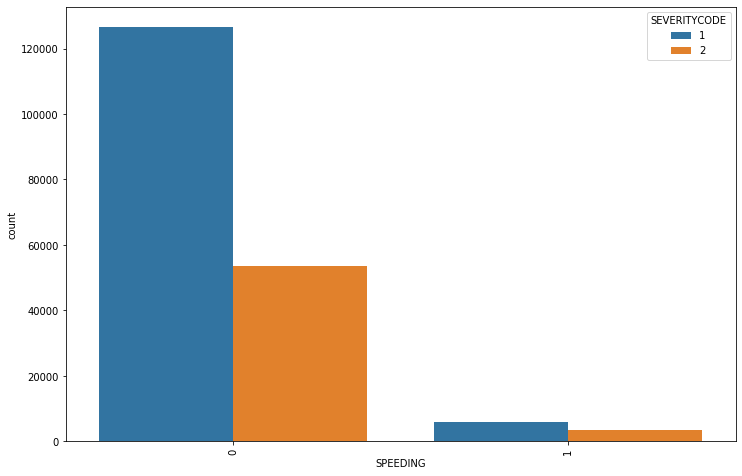

In [50]:
# plot features vs severity : SPEEDING
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

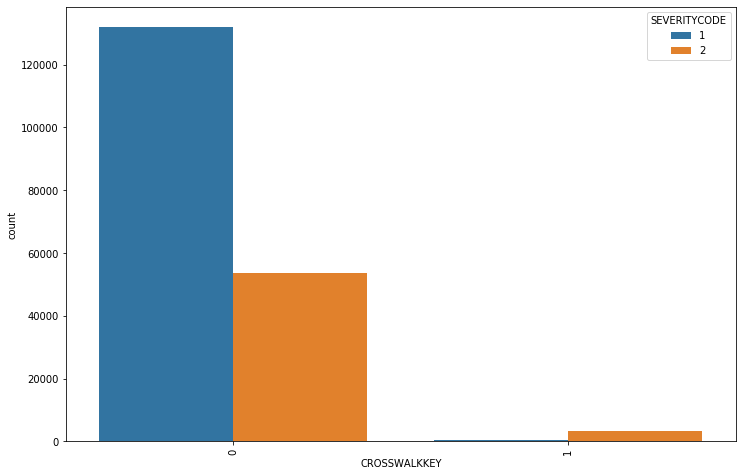

In [51]:
# plot features vs severity : crosswalk
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="CROSSWALKKEY", hue="SEVERITYCODE", data=df)
plt.xticks(rotation=90)

In [59]:
print("weather: ",df["WEATHER"].unique())
print("road: ",df["ROADCOND"].unique())
print("light: ",df["LIGHTCOND"].unique())

weather:  ['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
road:  ['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
light:  ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


set X and y

In [79]:
X = df [['WEATHER','ROADCOND','LIGHTCOND','SPEEDING','CROSSWALKKEY']].values
X[0:5]

array([['Overcast', 'Wet', 'Daylight', 0, 0],
       ['Raining', 'Wet', 'Dark - Street Lights On', 0, 0],
       ['Overcast', 'Dry', 'Daylight', 0, 0],
       ['Clear', 'Dry', 'Daylight', 0, 0],
       ['Raining', 'Wet', 'Daylight', 0, 0]], dtype=object)

In [90]:
y = np.asarray(df["SEVERITYCODE"])
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

encode the "WEATHER", "ROADCOND" and "LIGHTCOND"

In [81]:
from sklearn import preprocessing
le_w = preprocessing.LabelEncoder()
le_w.fit(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X[:,0] = le_w.transform(X[:,0]) 

le_r = preprocessing.LabelEncoder()
le_r.fit(['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
 'Standing Water', 'Oil'])
X[:,1] = le_r.transform(X[:,1])

le_l = preprocessing.LabelEncoder()
le_l.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Unknown',
 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
 'Dark - Unknown Lighting'])
X[:,2] = le_l.transform(X[:,2]) 

X[0:5]

array([[4, 8, 5, 0, 0],
       [6, 8, 2, 0, 0],
       [4, 0, 5, 0, 0],
       [1, 0, 5, 0, 0],
       [6, 8, 5, 0, 0]], dtype=object)

Also, we normalize the dataset:

In [82]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.32145781,  1.4789272 ,  0.35007251, -0.22752373, -0.1421677 ],
       [ 1.02224659,  1.4789272 , -1.40094051, -0.22752373, -0.1421677 ],
       [ 0.32145781, -0.71204349,  0.35007251, -0.22752373, -0.1421677 ],
       [-0.72972538, -0.71204349,  0.35007251, -0.22752373, -0.1421677 ],
       [ 1.02224659,  1.4789272 ,  0.35007251, -0.22752373, -0.1421677 ]])

we split our dataset into train and test set:

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151469, 5) (151469,)
Test set: (37868, 5) (37868,)


### Modeling: Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

predict_proba 

In [86]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.68834276, 0.31165724],
       [0.85955739, 0.14044261],
       [0.73540091, 0.26459909],
       ...,
       [0.56886102, 0.43113898],
       [0.66498629, 0.33501371],
       [0.75565208, 0.24434792]])

### Evaluation 

jaccard index

In [87]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7104943487905355

confusion matrix

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[26257   105]
 [10858   648]]


Confusion matrix, without normalization
[[26257   105]
 [10858   648]]


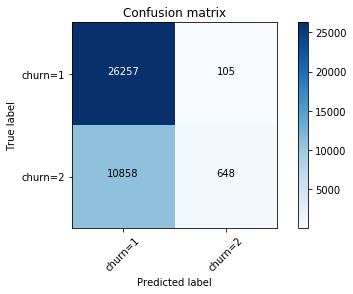

In [94]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=2'],normalize= False,  title='Confusion matrix')